# Visualizing Topic Distributions

## Creating

In [1]:
import random
import palettable
import pandas as pd
from time import sleep
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

def main():
    # Urls
    plots = []
    
    # Colors
    palette = palettable.colorbrewer.qualitative.Accent_8.hex_colors + \
              palettable.colorbrewer.qualitative.Dark2_6.hex_colors
    random.seed(18675309)
    random.shuffle(palette)

    for i in range(5, 16):
        t = 'pd_topics_' + str(i) + '.csv'
        d = 'topics_definitions_' + str(i) + '.csv'
        filename = 'topic' + str(i)
        
        # Topic assignments
        df = pd.read_csv('../../results/'+t, header=None)
        df.columns = ['tokenized_description', 'topic']
        df = df[df['tokenized_description'] != '[]']
        topics = pd.DataFrame({'count' : df.groupby('topic')['topic'].count()}).reset_index()
        
        # Topic definitions
        df = pd.read_csv('../../results/'+d, header=None)
        df.columns = ['topic', 'words']
        df['words'] = df['words'].apply(lambda x: ', '.join(x.split()[:10]))
        
        # Merge
        df = pd.merge(topics, df, on='topic')
        
        # Chart data
        data = Data([
            Bar(
                x=df['topic'].tolist(),
                y=df['count'].tolist(),
                text=df['words'].tolist(),
                textfont=Font(
                    family='Times new roman'
            ),
                marker=Marker(
                    color=palette
                ),
                line=Line(
                        color='white',
                        width= 1.0
                    )
            )
        ])
        layout = Layout(
            title='Purchase Orders per Topic',
            font=Font(
                family='Times new roman'
            ),
            showlegend=False
        )
        fig = Figure(data=data, layout=layout)
        
        # Figure
        plots.append(py.plot(fig, filename = filename, auto_open=False))
        
        # Sleep
        sleep(random.randint(30, 60))
        
    # Return
    return plots

In [2]:
plots = main()

## Plots

Note that the topic numbers are not consistent across graphs. This, known as label switching in the literature, is due to LDA not being an identifiable model.

Source: http://pythonhosted.org/lda/getting_started.html

The following plots are for the 11 LDA results we created, for number of topics from 5 to 15. On mouseover, the top 10 words for each topic are shown.

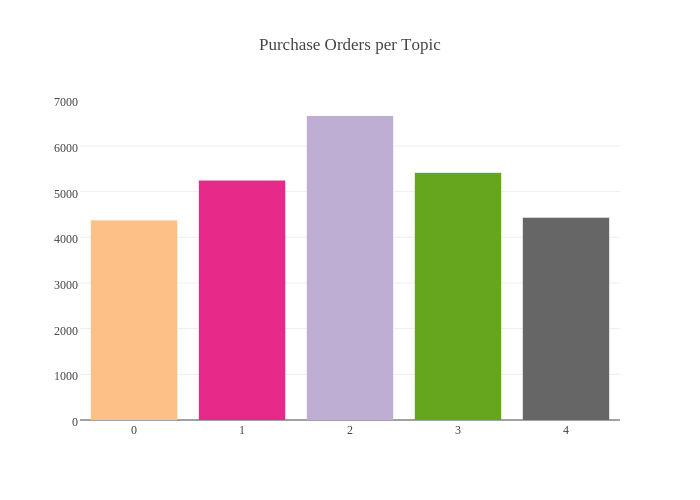

In [3]:
tls.embed(plots[0])

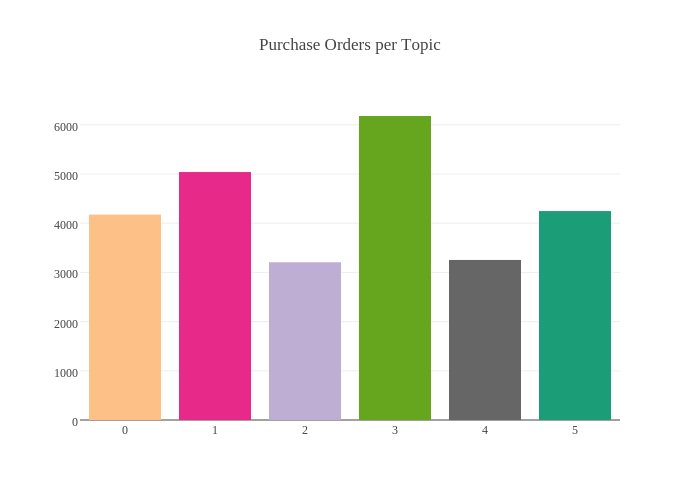

In [4]:
tls.embed(plots[1])

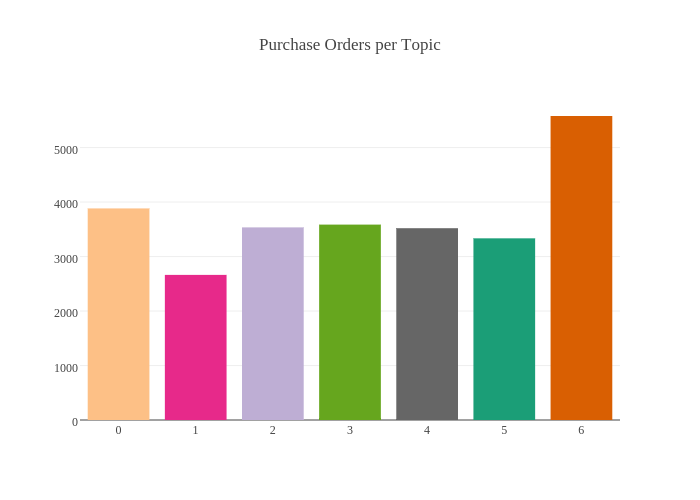

In [5]:
tls.embed(plots[2])

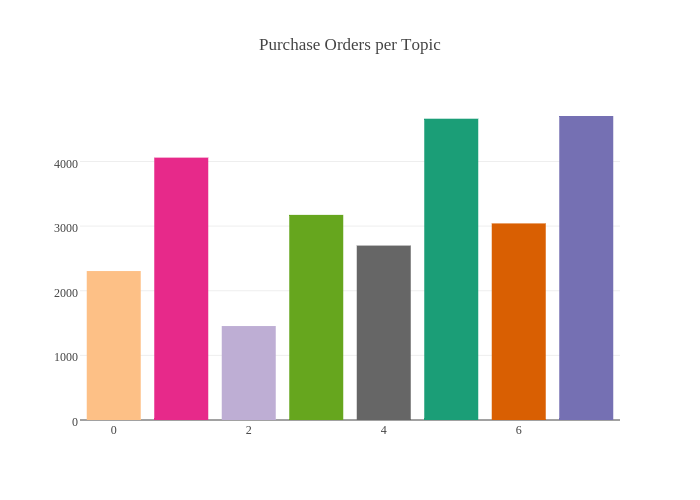

In [6]:
tls.embed(plots[3])

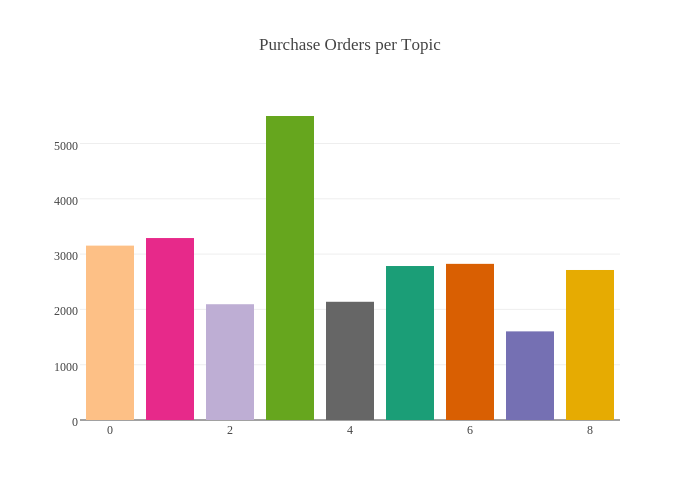

In [7]:
tls.embed(plots[4])

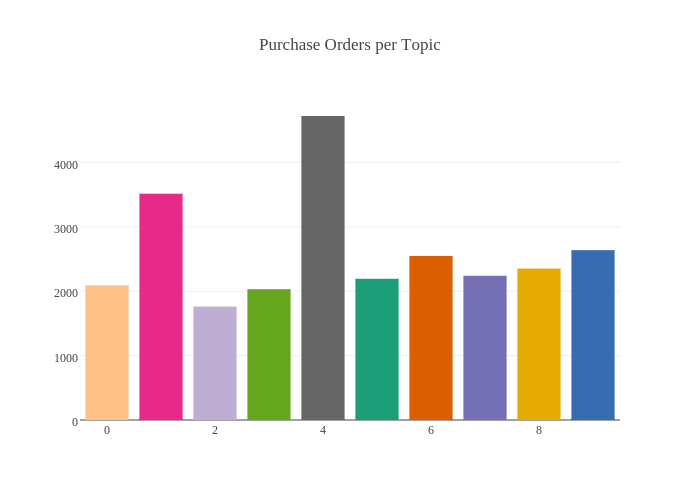

In [8]:
tls.embed(plots[5])

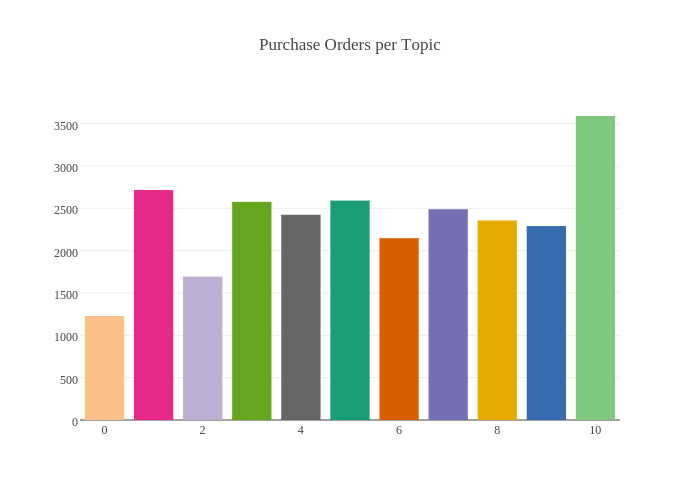

In [9]:
tls.embed(plots[6])

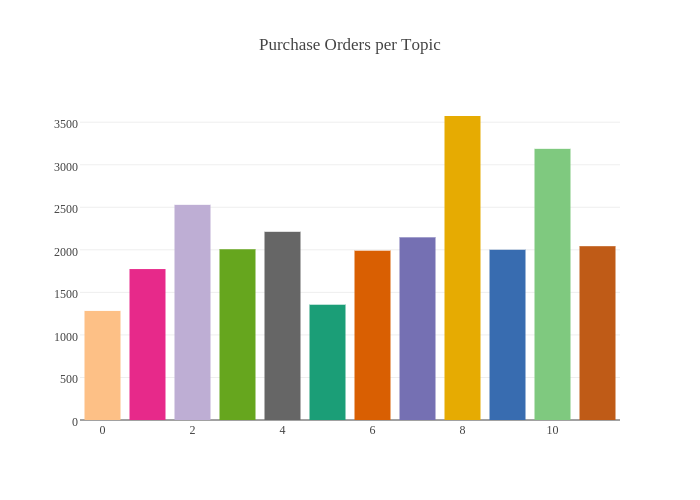

In [10]:
tls.embed(plots[7])

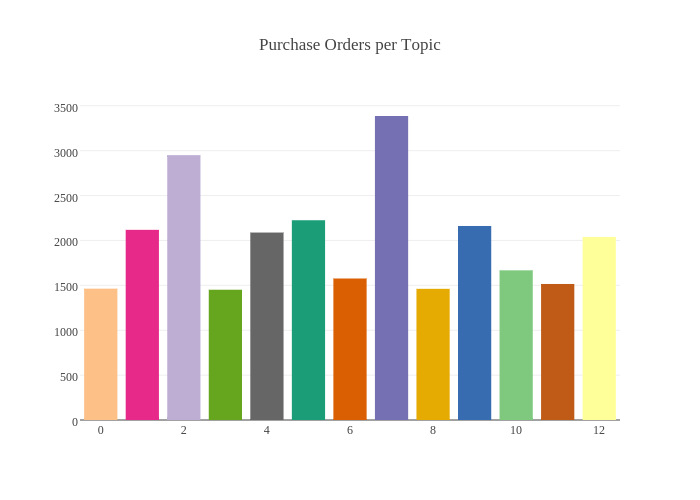

In [11]:
tls.embed(plots[8])

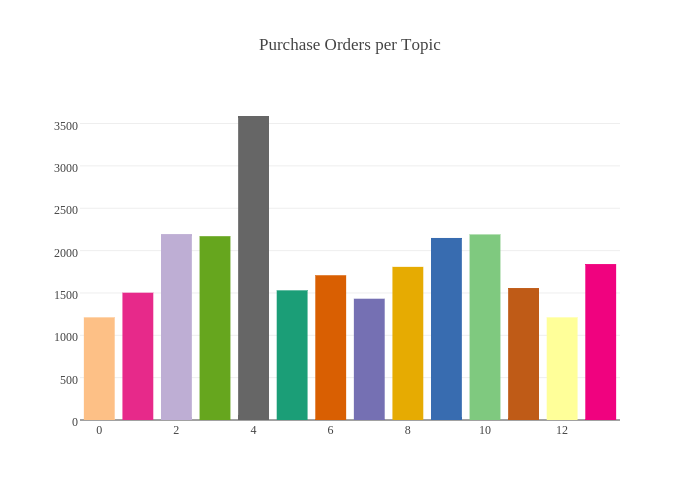

In [12]:
tls.embed(plots[9])

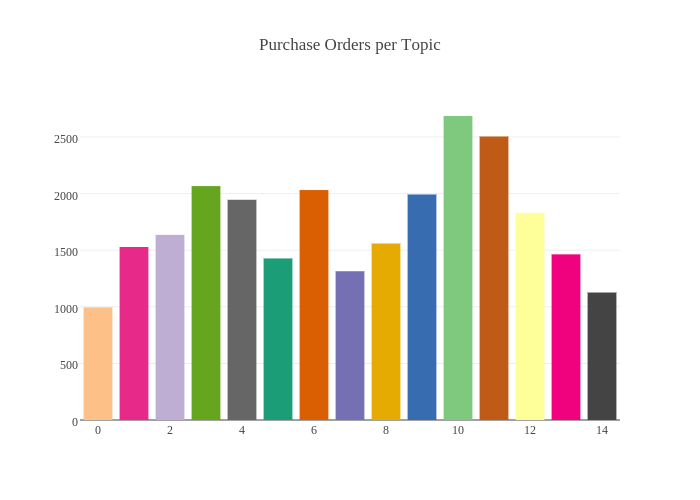

In [13]:
tls.embed(plots[10])